In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()


(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [5]:
x = df.drop("price",axis=1)
y = df["price"]
x,y

(      make  body  mileage  engV  engType  registration  year  drive
 0       23     0       68  2.50        1             1  2010      1
 1       50     3      173  1.80        1             1  2011      2
 2       50     2      135  5.50        3             1  2008      2
 3       50     5      162  1.80        0             1  2012      0
 4       55     0       83  2.00        3             1  2013      1
 5       30     3      199  2.00        3             1  2003      0
 6       59     4      185  1.50        0             1  2011      0
 7       50     3      146  1.80        1             1  2012      2
 8       50     3      125  2.20        0             1  2010      2
 9       55     0        0  1.20        3             1  2016      0
 10      50     3      190  1.80        1             1  2011      2
 11      50     3      164  1.80        1             1  2012      2
 12      50     3      159  1.80        1             1  2012      2
 13       5     3      290  4.80  

## 1.2 Split the data into test and train datasets using train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [9]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [11]:
print(model.intercept_,"\n",model.coef_)

-2437291.3034443585 
 [  -45.93147738 -1640.25229844   -44.28317674   504.71401307
 -1006.83674769  4621.15249622  1224.38053371  8746.09691357]


## 1.5 Use the test data to make predictions

In [13]:
y_test_prediction = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [16]:
MSE = mean_squared_error(Y_test,y_test_prediction)
print("MSE = "+str(MSE),"\nRMSE = "+str(np.sqrt(MSE)))

MSE = 333055611.6597575 
RMSE = 18249.811277373734


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The newness of the car adds about $1200 to the value of the car. Higher values are newer, so they have greater prices. It would be easier to tried to convert the year feature to an age feature.

## 1.8 How should we interpret the Root-Mean-Square Error?


MSE is the average of the distance from each prediction to its true value, squared. RMSE is the square root of the MSE. We square it to account for negative values and take the square root to rescale the value.

## 1.9 How should we interpret the $R^2$?

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [19]:
y = np.log(y)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

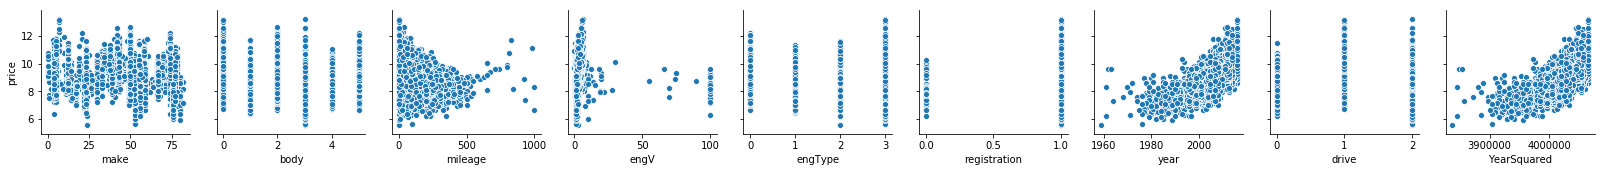

In [51]:
df1 = pd.concat([x,y],axis=1)

sns.pairplot(df1,y_vars=["price"],x_vars = df1.drop("price",axis=1).columns.values)


## 2.3 If appropriate, create any polynomial features. 

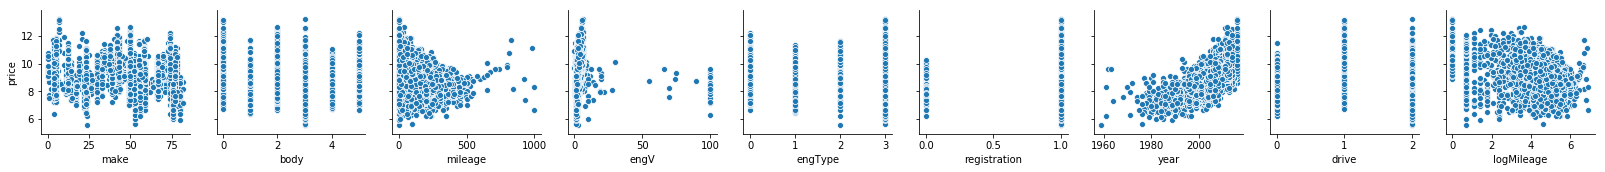

In [61]:
df1["logMileage"] =np.log(df1["mileage"]+1)
sns.pairplot(df1,y_vars=["price"],x_vars = df1.drop("price",axis=1).columns.values)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [67]:
x = df1.drop("price",axis=1)
y = df1["price"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.5)
model = LinearRegression()
model.fit(X_train,Y_train)
y_prediction = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(Y_test, y_prediction))
print("intercept =", model.intercept_)
coef = zip(list(model.coef_), list(x.columns.values))
print(tuple(coef))
print("RMSE = ",RMSE)
print("R^2 = ", r2_score(Y_test,y_prediction))



intercept = -182.74632231866846
((-0.001024992667112474, 'make'), (-0.09964915015705886, 'body'), (0.001040648438174667, 'mileage'), (0.011602461110959637, 'engV'), (-0.055674118655783214, 'engType'), (0.738709615220465, 'registration'), (0.0955305525590227, 'year'), (0.38647607644264276, 'drive'), (-0.10731991980242835, 'logMileage'))
RMSE =  0.5517079801301464
R^2 =  0.6638589760795045


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Every change in year on the car changes the price by 9%.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient seeks to minimize the errors between predictions and true values. 

## 3.2 What is the "Learning Rate" and what is its function?

for the simple Gradient Descent function used in class, we multiply the total learning rate by average of the error and ajust our prediction coefficeints by that amount. In general, learning rate control the amount of change we make to our model.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [81]:
X = sm.add_constant(x)
model = sm.OLS(y,X).fit(cov_type="HC3")
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1580.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:43:57   Log-Likelihood:                -7050.1
No. Observations:                8495   AIC:                         1.412e+04
Df Residuals:                    8485   BIC:                         1.419e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.2062      3.404    -53.233   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [79]:
vif = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
vif =list(vif)
vif = zip ( list(df1.columns.values), vif)
print( tuple(vif) )


(('make', 123307.91473135841), ('body', 1.0593593038952498), ('mileage', 1.1591888975893014), ('engV', 2.978984641975231), ('engType', 1.0093775382409373), ('registration', 1.1473133317575896), ('year', 1.0924069582224154), ('drive', 1.4586590086950617), ('price', 1.1427962421182585), ('logMileage', 2.4111761245412446))


we have strong multicollinearity problems with the make factor.